# Home Price Index vs S&P500 Index - A Time Series Plot based Analysis

### To run this notebook you need the following libraries: pandas, matplotlib,seaborn, and statsmodel.

#### We have to run the without forecasting notebook first to generate the dataset required for this notebook.


## 📊 How Holt-Winters Exponential Smoothing Forecasting Works

You're using the **Holt-Winters Exponential Smoothing model** (`ExponentialSmoothing` from `statsmodels`) 

### 🔧 Core Idea

This model breaks your time series into **three components**:

| Component      | Description |
|----------------|-------------|
| **Level**      | The baseline of the time series at any point in time |
| **Trend**      | The direction and strength of long-term change |
| **Seasonality**| Repeating patterns (e.g., monthly or yearly cycles) |

It uses **exponential smoothing**: more recent data points are weighted more heavily than older ones.

### ✅ Why This Model Works Well Here

| Dataset        | Why Holt-Winters Is a Good Fit |
|----------------|-------------------------------|
| **Zillow HPI** | Smooth growth + mild seasonal housing cycles |
| **S&P 500**    | Trend-following without assuming volatility patterns |

---

### 🧠 Benefits

- Easy to interpret
- Captures seasonality and trend without requiring stationarity
- Automatically optimizes smoothing parameters

---

### ⚠️ Limitations

- Assumes **linear trends**
- Can’t incorporate external factors (e.g., interest rates)
- Not suitable for highly volatile or shock-prone data

---

If needed, you can extract and visualize the model’s internal components (level, trend, seasonality) or compare it with other models like **Prophet**.


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_1608\3532974512.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Date'] = pd.date_range(start="2020-04-30", periods=len(df), freq='M')
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_1608\3532974512.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hpi_forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=60, freq='M')
C:\Users\Divya Gunasekara

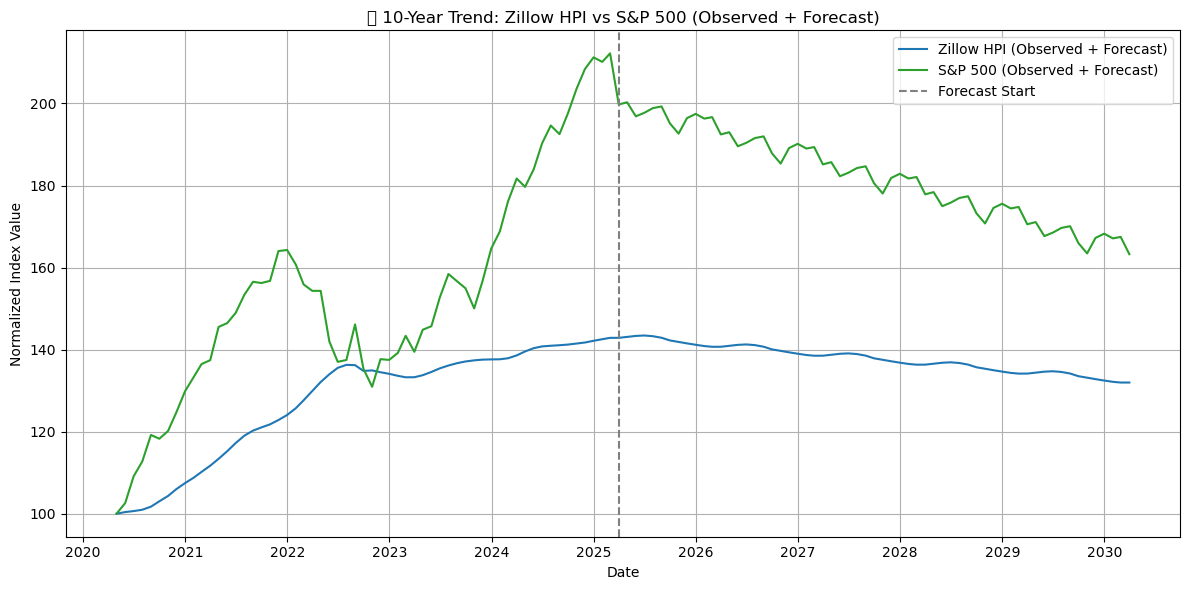

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load normalized data
df = pd.read_csv("data/normalized_zillow_sp500.csv")

# Create monthly date index
df['Date'] = pd.date_range(start="2020-04-30", periods=len(df), freq='M')
df.set_index('Date', inplace=True)

# Forecast HPI and SP500 using Holt-Winters
hpi_model = ExponentialSmoothing(df['HPI'], trend='add', seasonal='add', seasonal_periods=12).fit()
sp500_model = ExponentialSmoothing(df['SP500'], trend='add', seasonal='add', seasonal_periods=12).fit()

hpi_forecast = hpi_model.forecast(60)
sp500_forecast = sp500_model.forecast(60)

hpi_forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=60, freq='M')
sp500_forecast.index = hpi_forecast.index

# Combine observed and forecasted
full_hpi = pd.concat([df['HPI'], hpi_forecast])
full_sp500 = pd.concat([df['SP500'], sp500_forecast])
full_df = pd.DataFrame({'HPI': full_hpi, 'SP500': full_sp500})

plt.figure(figsize=(12, 6))
plt.plot(full_df.index, full_df['HPI'], label='Zillow HPI (Observed + Forecast)', color='tab:blue')
plt.plot(full_df.index, full_df['SP500'], label='S&P 500 (Observed + Forecast)', color='tab:green')
plt.axvline(x=df.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title("📈 10-Year Trend: Zillow HPI vs S&P 500 (Observed + Forecast)")
plt.xlabel("Date")
plt.ylabel("Normalized Index Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_1608\2731806306.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Divya Gunasekaran\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


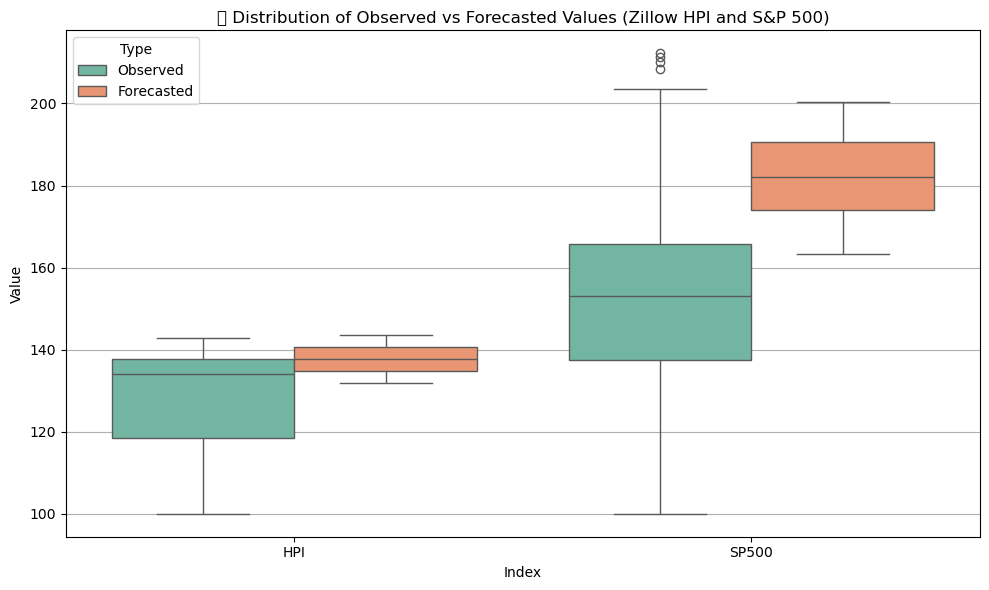

In [11]:
# Tag observed vs forecasted
observed = full_df.loc[:df.index[-1]].copy()
forecasted = full_df.loc[df.index[-1] + pd.DateOffset(days=1):].copy()

observed['Type'] = 'Observed'
forecasted['Type'] = 'Forecasted'

# Reset index to expose 'Date' column
observed = observed.reset_index()
forecasted = forecasted.reset_index()

# Combine and reshape
combined = pd.concat([observed, forecasted])
combined.rename(columns={'index': 'Date'}, inplace=True)

melted = combined.melt(id_vars=['Date', 'Type'], value_vars=['HPI', 'SP500'], var_name='Index', value_name='Value')

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Index', y='Value', hue='Type', palette='Set2')
plt.title("📦 Distribution of Observed vs Forecasted Values (Zillow HPI and S&P 500)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [13]:
# CAGR calculation over 10 years
start_value = full_df.iloc[0]
end_value = full_df.iloc[-1]
years = 10

cagr_hpi = ((end_value['HPI'] / start_value['HPI']) ** (1/years)) - 1
cagr_sp500 = ((end_value['SP500'] / start_value['SP500']) ** (1/years)) - 1

print(f"🏠 Zillow HPI 10-Year CAGR: {cagr_hpi:.2%}")
print(f"📈 S&P 500 10-Year CAGR: {cagr_sp500:.2%}")

🏠 Zillow HPI 10-Year CAGR: 2.81%
📈 S&P 500 10-Year CAGR: 5.02%


## 💼 Investment Comparison: Property vs Stock Market

We compare a 10-year investment in **real estate** (Zillow HPI) versus the **S&P 500** using observed + forecasted data.

---

### 📊 Quantitative Comparison (2020–2030)

| Metric               | 🏠 Zillow HPI (Property) | 📈 S&P 500 (Stocks) |
|----------------------|-------------------------|---------------------|
| **10-Year CAGR**     | **2.81%**               | **5.02%**           |
| **Volatility (Boxplot)** | Low                     | High                |
| **Seasonality**      | Mild (spring/summer)     | Minimal             |
| **Drawdowns**        | Shallow                  | Frequent            |

---

### 💰 $100,000 Investment Example

- **Zillow HPI**  
  $100,000 × (1 + 0.0281)^10 ≈ **$131,990**

- **S&P 500**  
  $100,000 × (1 + 0.0502)^10 ≈ **$162,900**

➡️ *S&P 500 grows 24% more than housing over 10 years.*

---

### 🧠 Qualitative Comparison

| Factor               | Property                        | Stock Market (S&P 500)     |
|----------------------|----------------------------------|-----------------------------|
| **Liquidity**        | Low – slow to sell               | High – trade anytime        |
| **Risk Profile**     | Low volatility                   | High volatility             |
| **Leverage**         | Easily financed with mortgage    | Margin available but riskier|
| **Tax Benefits**     | Mortgage deduction + depreciation| Capital gains/dividend tax  |
| **Income Potential** | Rental income possible           | Dividends (lower)           |
| **Maintenance**      | Physical upkeep required         | None                        |
| **Diversification**  | Poor – location-dependent        | Strong – 500+ companies     |
| **Emotional Value**  | High – use, legacy               | None                        |

---

### 🧾 Summary

- 🏠 **Real Estate** is a **stable**, long-term asset, good for risk-averse investors or rental income.
- 📈 **S&P 500** offers **higher returns**, liquidity, and broad diversification, suited for growth-focused investors.

---

### 🧩 Recommendation by Profile

| Investor Profile                  | Better Investment |
|----------------------------------|-------------------|
| Long-term, conservative           | Property 🏠        |
| Growth-focused, flexible          | Stocks 📈          |
| Passive income / rental interest  | Property 🏠        |
| Low-maintenance, high liquidity   | Stocks 📈          |
